# Exercise: Insights

- A Studio that produces movies asked us whether we could provide valuable (for them) insights based on our data.

- Also, our procurement team, ie the team that signs new studios and new films, asked us whether we could help them make data-driven decisions on what films to sign next.

In [196]:
import re
import numpy as np
import pandas as pd
import dask.dataframe as dd

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [281]:
movies_df = pd.read_csv("/Users/cesareressa/Documents/datasets/movies.csv")
ratings_df = pd.read_csv("/Users/cesareressa/Documents/datasets/ratings.csv")
tags_df = pd.read_csv("/Users/cesareressa/Documents/datasets/tags.csv")

In [284]:
movies_df

movies_df["genres"] = movies_df["genres"].str.replace("|", ", ", regex=True)

In [285]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy"
1,2,Jumanji (1995),"Adventure, Children, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
3,4,Waiting to Exhale (1995),"Comedy, Drama, Romance"
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),"Adventure, Drama, Horror, Sci-Fi"


In [54]:
#number of movies with ratings

len(ratings_df.movieId.unique())

53889

In [53]:
#number of movies with tags

len(tags_df.movieId.unique())

45981

In [179]:
tags_df["tag"].sort_values(ascending=True)

761894    !950's Superman TV show
212949          !David O. Russell
212950            !George Clooney
212925              !George Lucas
106772        "A Christmas Carol"
                   ...           
483319                        NaN
483321                        NaN
483326                        NaN
483327                        NaN
926342                        NaN
Name: tag, Length: 1108997, dtype: object

In [4]:
dd_movies = dd.read_csv("/Users/cesareressa/Documents/datasets/movies.csv")
dd_ratings = dd.read_csv("/Users/cesareressa/Documents/datasets/ratings.csv")
dd_tags = dd.read_csv("/Users/cesareressa/Documents/datasets/tags.csv")

In [5]:
dd_user_info = dd.merge(dd_ratings, dd_tags, how="left", on=["userId", "movieId"], suffixes=("_rating", "_tag"))

In [47]:
df_user_info = dd_user_info.compute()

In [50]:
len(df_user_info["movieId"].unique())

53889

In [8]:
df_user_info[df_user_info.userId == 14]

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag
1117,14,1,4.5,1442169375,NaN,NaN
1118,14,2,4.0,1522101105,NaN,NaN
1119,14,110,4.5,1442169623,epic,1.443149e+09
1120,14,110,4.5,1442169623,Medieval,1.443149e+09
1121,14,296,4.0,1442169576,NaN,NaN
...,...,...,...,...,...,...
1289,14,142488,4.0,1465058634,NaN,NaN
1290,14,152081,4.5,1465058553,NaN,NaN
1291,14,160718,4.5,1522101078,NaN,NaN
1292,14,166024,4.5,1497536861,NaN,NaN


In [9]:
#add datetime columns -
# look for seasonality - timeseries

In [10]:
dd_complete = dd.merge(df_user_info, dd_movies, how="left", on="movieId")

In [11]:
df_complete = dd_complete.compute()

In [12]:
df_complete.describe()

,userId,movieId,rating,timestamp_rating,timestamp_tag
count,2.836350e+07,2.836350e+07,2.836350e+07,2.836350e+07,8.304920e+05
mean,1.416773e+05,1.919388e+04,3.536770e+00,1.197512e+09,1.398766e+09
std,8.170236e+04,3.591059e+04,1.066656e+00,2.164155e+08,1.110469e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08,1.135429e+09
25%,7.077700e+04,1.127000e+03,3.000000e+00,1.002635e+09,1.308503e+09
50%,1.415620e+05,2.762000e+03,4.000000e+00,1.182207e+09,1.435359e+09
75%,2.121950e+05,7.360000e+03,4.000000e+00,1.427658e+09,1.492018e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09,1.537945e+09


In [13]:
df_complete[df_complete.userId == 27034]

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres
28361253,27034,296,4.0,1367614733,cult film,1.367615e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
28361254,27034,296,4.0,1367614733,Quentin Tarantino,1.367615e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
28361256,27034,296,4.0,1367614733,Samuel L. Jackson,1.367615e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
28361258,27034,356,4.0,1367614714,NaN,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
28361260,27034,431,3.5,1367497581,NaN,NaN,Carlito's Way (1993),Crime|Drama
...,...,...,...,...,...,...,...,...
28361387,27034,52245,3.0,1367535783,Will Ferrell,1.367536e+09,Blades of Glory (2007),Comedy|Romance
28361389,27034,67073,1.5,1367535614,zombies,1.367536e+09,Day of the Dead (2008),Horror
28361391,27034,88744,4.0,1367498028,NaN,NaN,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
28361393,27034,91429,3.0,1367535546,NaN,NaN,12 Days of Terror (2005),Drama|Horror|Thriller


In [14]:
df_complete["datetime_rating"] = pd.to_datetime(df_complete["timestamp_rating"], unit="s")
df_complete["datetime_tag"] = pd.to_datetime(df_complete["timestamp_tag"], unit="s")

In [15]:
df_complete

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,datetime_rating,datetime_tag
0,1,307,3.5,1256677221,NaN,NaN,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,2009-10-27 21:00:21,NaT
1,106361,8368,3.5,1501871808,NaN,NaN,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,2017-08-04 18:36:48,NaT
2,131346,4816,1.5,1433273308,NaN,NaN,Zoolander (2001),Comedy,2015-06-02 19:28:28,NaT
3,206877,208,4.0,854979504,NaN,NaN,Waterworld (1995),Action|Adventure|Sci-Fi,1997-02-03 14:18:24,NaT
4,53456,1777,3.0,945051094,NaN,NaN,"Wedding Singer, The (1998)",Comedy|Romance,1999-12-13 02:11:34,NaT
...,...,...,...,...,...,...,...,...,...,...
28363491,27045,260,5.0,955118461,NaN,NaN,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2000-04-07 14:41:01,NaT
28363492,27045,317,5.0,955121387,NaN,NaN,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,2000-04-07 15:29:47,NaT
28363493,27045,349,4.0,955119023,NaN,NaN,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,2000-04-07 14:50:23,NaT
28363494,27045,367,4.0,955121417,NaN,NaN,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,2000-04-07 15:30:17,NaT


In [16]:
# df_complete["year"] = df_complete.title.str.findall(r"\((\d+)\)")

df_complete["movie_year"] = df_complete.title.str.findall(r"\((\d\d\d\d)\)").apply(','.join)  

In [244]:
dummy_str = df_complete[df_complete["movieId"] == 308]["genres"].iloc[0]

dummy_str.split("|")

['Comedy', 'Drama']

In [93]:
# df_complete[df_complete.title.str.contains("Star Wars")]

df_complete[df_complete.movieId == 8961]

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,datetime_rating,datetime_tag,movie_year
72,106361,8961,5.0,1501871783,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2017-08-04 18:36:23,NaT,2004
1945,156497,8961,3.5,1192475158,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2007-10-15 19:05:58,NaT,2004
2207,131346,8961,3.5,1433259641,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2015-06-02 15:40:41,NaT,2004
2882,232756,8961,5.0,1138161464,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2006-01-25 03:57:44,NaT,2004
2890,182023,8961,3.5,1196302050,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2007-11-29 02:07:30,NaT,2004
...,...,...,...,...,...,...,...,...,...,...,...
28359196,80068,8961,3.0,1194819302,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2007-11-11 22:15:02,NaT,2004
28361158,27030,8961,4.0,1111563627,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2005-03-23 07:40:27,NaT,2004
28361217,80075,8961,3.0,1342904310,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2012-07-21 20:58:30,NaT,2004
28361679,27035,8961,4.5,1120773583,NaN,NaN,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,2005-07-07 21:59:43,NaT,2004


In [223]:
genres_per_movie_dict = {}

#get unique movie_ids into a list
unique_movieIds = movies_df["movieId"].unique()

list_err = []

for count, movieId in enumerate(unique_movieIds):
    genres_per_movie_dict[movieId] = movies_df[movies_df["movieId"] == movieId]["genres"][count].split("|")

    # except KeyError:
    #     list_err.append(count)
    #     list_err.append(movieId)




In [224]:
genres_per_movie_dict

{1: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 2: ['Adventure', 'Children', 'Fantasy'],
 3: ['Comedy', 'Romance'],
 4: ['Comedy', 'Drama', 'Romance'],
 5: ['Comedy'],
 6: ['Action', 'Crime', 'Thriller'],
 7: ['Comedy', 'Romance'],
 8: ['Adventure', 'Children'],
 9: ['Action'],
 10: ['Action', 'Adventure', 'Thriller'],
 11: ['Comedy', 'Drama', 'Romance'],
 12: ['Comedy', 'Horror'],
 13: ['Adventure', 'Animation', 'Children'],
 14: ['Drama'],
 15: ['Action', 'Adventure', 'Romance'],
 16: ['Crime', 'Drama'],
 17: ['Drama', 'Romance'],
 18: ['Comedy'],
 19: ['Comedy'],
 20: ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 21: ['Comedy', 'Crime', 'Thriller'],
 22: ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 23: ['Action', 'Crime', 'Thriller'],
 24: ['Drama', 'Sci-Fi'],
 25: ['Drama', 'Romance'],
 26: ['Drama'],
 27: ['Children', 'Drama'],
 28: ['Drama', 'Romance'],
 29: ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 30: ['Crime', 'Drama'],
 31: ['D

In [98]:
df_complete["genres_list"] = df_complete["movieId"].map(genres_per_movie_dict)

In [99]:
df_complete

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,datetime_rating,datetime_tag,movie_year,genres_list
0,1,307,3.5,1256677221,NaN,NaN,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,2009-10-27 21:00:21,NaT,1993,[Drama]
1,106361,8368,3.5,1501871808,NaN,NaN,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,2017-08-04 18:36:48,NaT,2004,"[Adventure, Fantasy, IMAX]"
2,131346,4816,1.5,1433273308,NaN,NaN,Zoolander (2001),Comedy,2015-06-02 19:28:28,NaT,2001,[Comedy]
3,206877,208,4.0,854979504,NaN,NaN,Waterworld (1995),Action|Adventure|Sci-Fi,1997-02-03 14:18:24,NaT,1995,"[Action, Adventure, Sci-Fi]"
4,53456,1777,3.0,945051094,NaN,NaN,"Wedding Singer, The (1998)",Comedy|Romance,1999-12-13 02:11:34,NaT,1998,"[Comedy, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...
28363491,27045,260,5.0,955118461,NaN,NaN,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2000-04-07 14:41:01,NaT,1977,"[Action, Adventure, Sci-Fi]"
28363492,27045,317,5.0,955121387,NaN,NaN,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,2000-04-07 15:29:47,NaT,1994,"[Comedy, Drama, Fantasy]"
28363493,27045,349,4.0,955119023,NaN,NaN,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,2000-04-07 14:50:23,NaT,1994,"[Action, Crime, Drama, Thriller]"
28363494,27045,367,4.0,955121417,NaN,NaN,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,2000-04-07 15:30:17,NaT,1994,"[Action, Comedy, Crime, Fantasy]"


In [101]:
df_complete[df_complete.genres.str.contains("Drama")]

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,datetime_rating,datetime_tag,movie_year,genres_list
0,1,307,3.5,1256677221,NaN,NaN,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,2009-10-27 21:00:21,NaT,1993,[Drama]
8,182023,3147,4.5,1196302323,NaN,NaN,"Green Mile, The (1999)",Crime|Drama,2007-11-29 02:12:03,NaT,1999,"[Crime, Drama]"
12,1,481,3.5,1256677456,NaN,NaN,Kalifornia (1993),Drama|Thriller,2009-10-27 21:04:16,NaT,1993,"[Drama, Thriller]"
13,156497,3753,4.0,1192478837,NaN,NaN,"Patriot, The (2000)",Action|Drama|War,2007-10-15 20:07:17,NaT,2000,"[Action, Drama, War]"
14,258124,33166,3.0,1391029286,NaN,NaN,Crash (2004),Crime|Drama,2014-01-29 21:01:26,NaT,2004,"[Crime, Drama]"
...,...,...,...,...,...,...,...,...,...,...,...,...
28363481,27045,4,3.0,955121634,NaN,NaN,Waiting to Exhale (1995),Comedy|Drama|Romance,2000-04-07 15:33:54,NaT,1995,"[Comedy, Drama, Romance]"
28363483,27045,48,4.0,955118348,NaN,NaN,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,2000-04-07 14:39:08,NaT,1995,"[Animation, Children, Drama, Musical, Romance]"
28363487,27045,169,4.0,955120369,NaN,NaN,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama,2000-04-07 15:12:49,NaT,1995,"[Adventure, Children, Drama]"
28363492,27045,317,5.0,955121387,NaN,NaN,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,2000-04-07 15:29:47,NaT,1994,"[Comedy, Drama, Fantasy]"


In [191]:
#what is the most popular movie of all time

# top_20_movies_all_time = df_complete.movieId.value_counts().head(20)

count_movies = df_complete.movieId.value_counts()

# sort by movieId
# df_complete.sort_val(by="movieId")




In [140]:
# top_movies = df_complete.copy()

# for movies in top_20_movies_all_time:
#     title = top_movies.loc[top_movies["movieId"] == movies, "title"]
#     print(movies)
#     #Top_20 = pd.DataFrame({'Movie': title, 'count': top})

In [252]:
# count_movies = pd.DataFrame({"total_views": count_movies})

count_movies = pd.DataFrame(count_movies)

count_movies = count_movies.rename(columns={"movieId": "total_views"})

count_movies

rating_means = pd.DataFrame(ratings_df.groupby("movieId")["rating"].mean())

rating_means


,rating
movieId,
1,3.886649
2,3.246583
3,3.173981
4,2.874540
5,3.077291
...,...
193876,3.000000
193878,2.000000
193880,2.000000


In [253]:
movies_df = pd.merge(movies_df, count_movies, left_on="movieId", right_on=count_movies.index)

movies_df = pd.merge(movies_df,  rating_means, on="movieId")

In [254]:
# movies_df["genres_list"] = movies_df["movieId"].map(lambda x : genres_per_movie_dict[x])

# movies_df["genres"] = movies_df["genres"].str.split("|")


In [263]:
movies_df

,movieId,title,genres,total_views,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",68972,3.886649
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",27271,3.246583
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",15595,3.173981
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2991,2.874540
4,5,Father of the Bride Part II (1995),[Comedy],15487,3.077291
...,...,...,...,...,...
53884,193876,The Great Glinka (1946),[(no genres listed)],1,3.000000
53885,193878,Les tribulations d'une caissière (2011),[Comedy],1,2.000000
53886,193880,Her Name Was Mumu (2016),[Drama],1,2.000000
53887,193882,Flora (2017),"[Adventure, Drama, Horror, Sci-Fi]",1,2.000000


Most watched movies of all times

In [256]:
movies_df.sort_values(by="total_views", ascending=False).head(20)

,movieId,title,genres,total_views,rating
315,318,"Shawshank Redemption, The (1994)","[Crime, Drama]",100805,4.424188
352,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",99162,4.056585
293,296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",96271,4.173971
587,593,"Silence of the Lambs, The (1991)","[Crime, Horror, Thriller]",89651,4.151412
2487,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",87652,4.149695
257,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",85743,4.120455
476,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",77114,3.665034
523,527,Schindler's List (1993),"[Drama, War]",72618,4.257502
108,110,Braveheart (1995),"[Action, Drama, War]",69450,4.008481
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",68972,3.886649


In [ ]:
#which genre is rated the highest?

#what is the best combination of genres?


#which

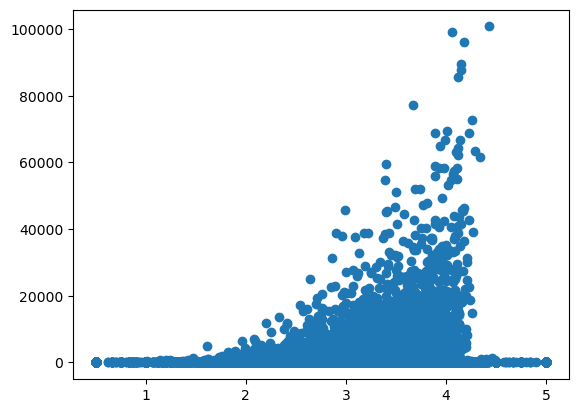

In [197]:
# ratings vs total views

plt.scatter(movies_df["rating"], movies_df["total_views"])

In [257]:
display(movies_df.loc[(movies_df["total_views"] > 50000) & (movies_df["rating"] > 3.8)])

,movieId,title,genres,total_views,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",68972,3.886649
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",55995,3.890193
46,47,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",56679,4.071687
49,50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",63327,4.291959
108,110,Braveheart (1995),"[Action, Drama, War]",69450,4.008481
148,150,Apollo 13 (1995),"[Adventure, Drama, IMAX]",59028,3.884301
257,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",85743,4.120455
293,296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",96271,4.173971
315,318,"Shawshank Redemption, The (1994)","[Crime, Drama]",100805,4.424188
352,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",99162,4.056585


In [272]:
# genres_per_movie_df = pd.DataFrame(genres_per_movie_dict)

# genres_per_movie_df

movies_df["genres"] = movies_df["genres"].str.strip("[]")

In [273]:
movies_df

,movieId,title,genres,total_views,rating
0,1,Toy Story (1995),NaN,68972,3.886649
1,2,Jumanji (1995),NaN,27271,3.246583
2,3,Grumpier Old Men (1995),NaN,15595,3.173981
3,4,Waiting to Exhale (1995),NaN,2991,2.874540
4,5,Father of the Bride Part II (1995),NaN,15487,3.077291
...,...,...,...,...,...
53884,193876,The Great Glinka (1946),NaN,1,3.000000
53885,193878,Les tribulations d'une caissière (2011),NaN,1,2.000000
53886,193880,Her Name Was Mumu (2016),NaN,1,2.000000
53887,193882,Flora (2017),NaN,1,2.000000
